# Summer of Code - Artificial Intelligence
## Week 07: Advanced Machine Learning Models

### Day 05: Decision Trees and Random Forests

In this notebook, we will explore **Decision Trees** and **Random Forests** using Python's Scikit-Learn library.


In [9]:
from sklearn.datasets import load_iris


iris = load_iris(as_frame=True)
X_iris = iris.data.values
y_iris = iris.target.values
print(f"Features shape: {X_iris.shape}")
print(f"Target shape: {y_iris.shape}")

Features shape: (150, 4)
Target shape: (150,)


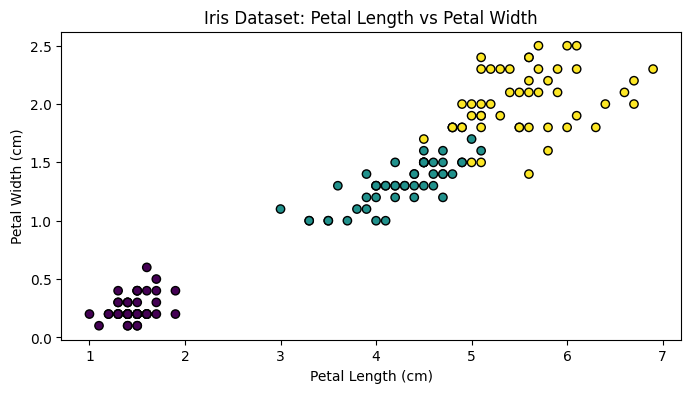

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))

plt.scatter(
    iris.frame['petal length (cm)'],
    iris.frame['petal width (cm)'],
    c=iris.target,
    cmap='viridis',
    edgecolor='k',
)

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris Dataset: Petal Length vs Petal Width")
plt.show()

# Decision Trees
A decision tree is a flowchart-like structure where each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

<img src="decision_tree.png" alt="Decision Tree" width="600">

## Decision Tree Classification


In [11]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [12]:
tree_clf.score(X_iris, y_iris)

0.9733333333333334

## Making Predictions

<img src="decision_tree_prediction.png" alt="Decision Tree Prediction" width="800">

In [13]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

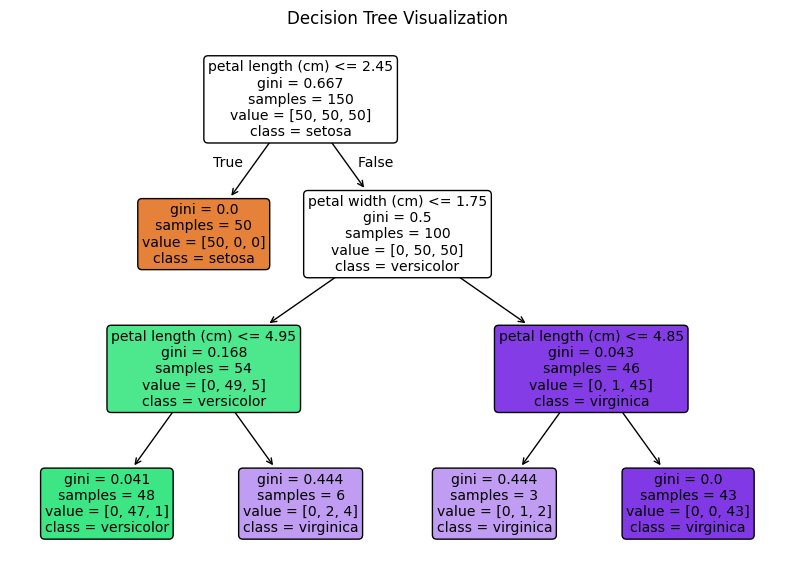

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(tree_clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

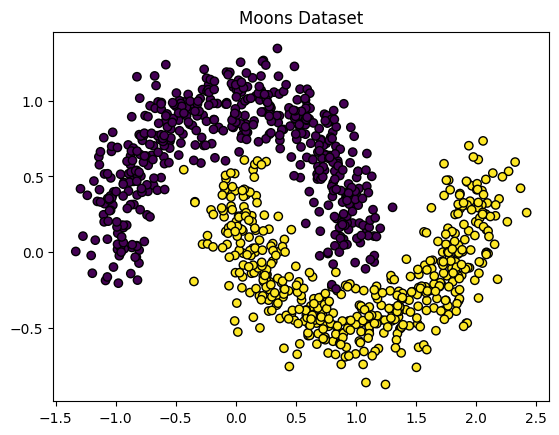

In [15]:
from sklearn.datasets import make_moons

X_moon, y_moon = make_moons(n_samples=1000, noise=0.15, random_state=42)

X_moon.shape, y_moon.shape
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap='viridis', edgecolor='k')
plt.title("Moons Dataset")
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X_moon, y_moon, test_size=0.3, random_state=42
)


In [47]:

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [48]:
tree_clf.score(X_train, y_train)

0.9128571428571428

In [49]:
tree_clf.score(X_test, y_test)

0.93

## Decision Tree Regression

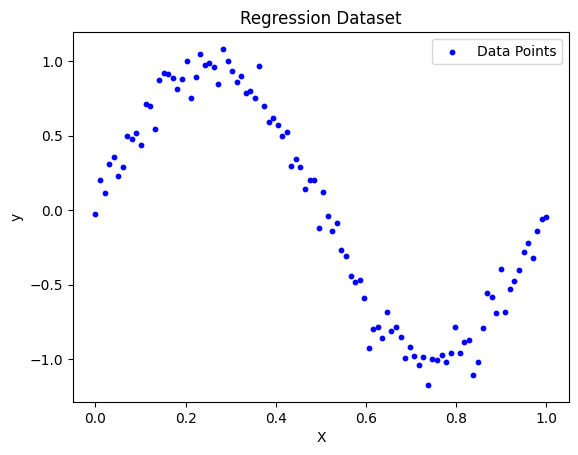

In [51]:
import numpy as np


X_reg = np.linspace(0, 1, 100).reshape(-1, 1)
y_reg = np.sin(2 * np.pi * X_reg).ravel() + np.random.normal(0, 0.1, X_reg.shape[0])

plt.scatter(X_reg, y_reg, color='blue', s=10, label='Data Points')
plt.title("Regression Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [52]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
reg_tree.fit(X_reg, y_reg)

DecisionTreeRegressor(max_depth=5, random_state=42)

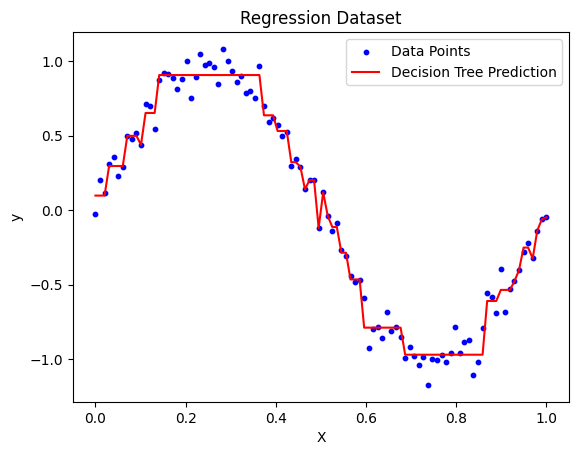

In [54]:
y_pred = reg_tree.predict(X_reg)

plt.scatter(X_reg, y_reg, color="blue", s=10, label="Data Points")
plt.plot(X_reg, y_pred, color="red", label="Decision Tree Prediction")
plt.title("Regression Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_reg, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0054


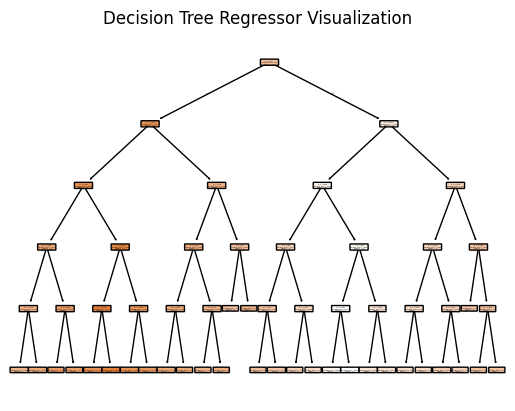

In [56]:
plot_tree(reg_tree,
            feature_names=["X"],
            filled=True,
            rounded=True)
plt.title("Decision Tree Regressor Visualization")
plt.show()

# Ensemble Learning
It is a technique that combines multiple machine learning models to improve overall performance. The main idea is to leverage the strengths of individual models while mitigating their weaknesses.

## Voting Classifier
A voting classifier combines multiple classification models and predicts the class label based on the majority vote (for classification) or average prediction (for regression).

<img src="voting_classifiers.png" alt="Voting Classifier" width="600">


In [57]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier(max_depth=3, random_state=42)),
        ('lr', LogisticRegression(max_iter=200, random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ], voting='hard'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=200,
                                                 random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))])

In [58]:
voting_clf.estimators_

[DecisionTreeClassifier(max_depth=3, random_state=42),
 LogisticRegression(max_iter=200, random_state=42),
 SVC(probability=True, random_state=42)]

In [59]:
voting_clf.named_estimators_

{'dt': DecisionTreeClassifier(max_depth=3, random_state=42),
 'lr': LogisticRegression(max_iter=200, random_state=42),
 'svc': SVC(probability=True, random_state=42)}

In [124]:
for model in voting_clf.estimators_:
    print(type(model))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
<class 'sklearn.linear_model._logistic.LogisticRegression'>
<class 'sklearn.svm._classes.SVC'>


In [62]:
for name, model in voting_clf.named_estimators_.items():
    accuracy = model.score(X_test, y_test)
    print(f"{name} accuracy: {accuracy}")

dt accuracy: 0.93
lr accuracy: 0.88
svc accuracy: 0.9933333333333333


In [63]:
voting_clf.score(X_test, y_test)

0.93

## Bagging and Pasting
Bagging (Bootstrap Aggregating) and Pasting are ensemble techniques that involve training multiple instances of the same model on different subsets of the training data.
- Bagging: Samples are drawn with replacement.
- Pasting: Samples are drawn without replacement.

### Random Forests
A Random Forest is an ensemble of decision trees, typically trained with the bagging method. The general idea is to combine multiple decision trees to improve the overall model's accuracy and robustness.

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100, max_depth=5, random_state=42
)  # random forest of 100 trees
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [79]:
rf_clf.score(X_test, y_test)

0.99